In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [6]:
raw_data = pd.read_csv('./KickStarterProjects.csv')

raw_data.head()

,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09-10-2015,1000.0,11-08-2015 12:12,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01-11-2017,30000.0,02-09-2017 04:43,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26-02-2013,45000.0,12-01-2013 00:20,220.0,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16-04-2012,5000.0,17-03-2012 03:24,1.0,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29-08-2015,19500.0,04-07-2015 08:35,1283.0,canceled,14,US,1283.0,19500.00


In [7]:
res_data = raw_data.drop(columns=['currency','goal']).copy()

print(np.shape(res_data))

res_data.head()

(378661, 12)


,ID,name,subcategory,category,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,09-10-2015,11-08-2015 12:12,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,01-11-2017,02-09-2017 04:43,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,26-02-2013,12-01-2013 00:20,220.0,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,16-04-2012,17-03-2012 03:24,1.0,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,29-08-2015,04-07-2015 08:35,1283.0,canceled,14,US,1283.0,19500.00


In [8]:
res_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   subcategory       378661 non-null  object 
 3   category          378661 non-null  object 
 4   deadline          378661 non-null  object 
 5   launched          378661 non-null  object 
 6   pledged           378661 non-null  float64
 7   state             378661 non-null  object 
 8   backers           378661 non-null  int64  
 9   country           378661 non-null  object 
 10  usd_pledged_real  378661 non-null  float64
 11  usd_goal_real     378661 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 34.7+ MB


In [14]:
print(np.shape(res_data))
res_data.duplicated()

(378661, 12)


0         False
1         False
2         False
3         False
4         False
          ...  
378656    False
378657    False
378658    False
378659    False
378660    False
Length: 378661, dtype: bool

In [13]:
np.sum(res_data.name.duplicated())

2938

In [15]:
non_null_data = res_data.dropna()
print(np.shape(non_null_data))

(378657, 12)


In [16]:
non_null_data.describe(include=[object]).T

,count,unique,top,freq
name,378657,375722,#NAME?,43
subcategory,378657,159,Product Design,22313
category,378657,15,Film & Video,63584
deadline,378657,3164,08-08-2014,705
launched,378657,347031,20-06-2017 16:00,15
state,378657,6,failed,197716
country,378657,23,US,292624


In [17]:
non_null_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,378657.0,1.074732e+09,6.190872e+08,5971.00,538249926.0,1.075276e+09,1.610149e+09,2.147476e+09
pledged,378657.0,9.683080e+03,9.563651e+04,0.00,30.0,6.200000e+02,4.076000e+03,2.033899e+07
backers,378657.0,1.056185e+02,9.071898e+02,0.00,2.0,1.200000e+01,5.600000e+01,2.193820e+05
usd_pledged_real,378657.0,9.059018e+03,9.097382e+04,0.00,31.0,6.243800e+02,4.050000e+03,2.033899e+07
usd_goal_real,378657.0,4.545425e+04,1.152956e+06,0.01,2000.0,5.500000e+03,1.550000e+04,1.663614e+08


<AxesSubplot:ylabel='backers'>

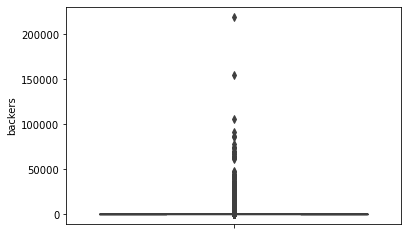

In [21]:
sns.boxplot(y = non_null_data['backers'],notch=True)

c:\Users\gelso\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\Users\gelso\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\gelso\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


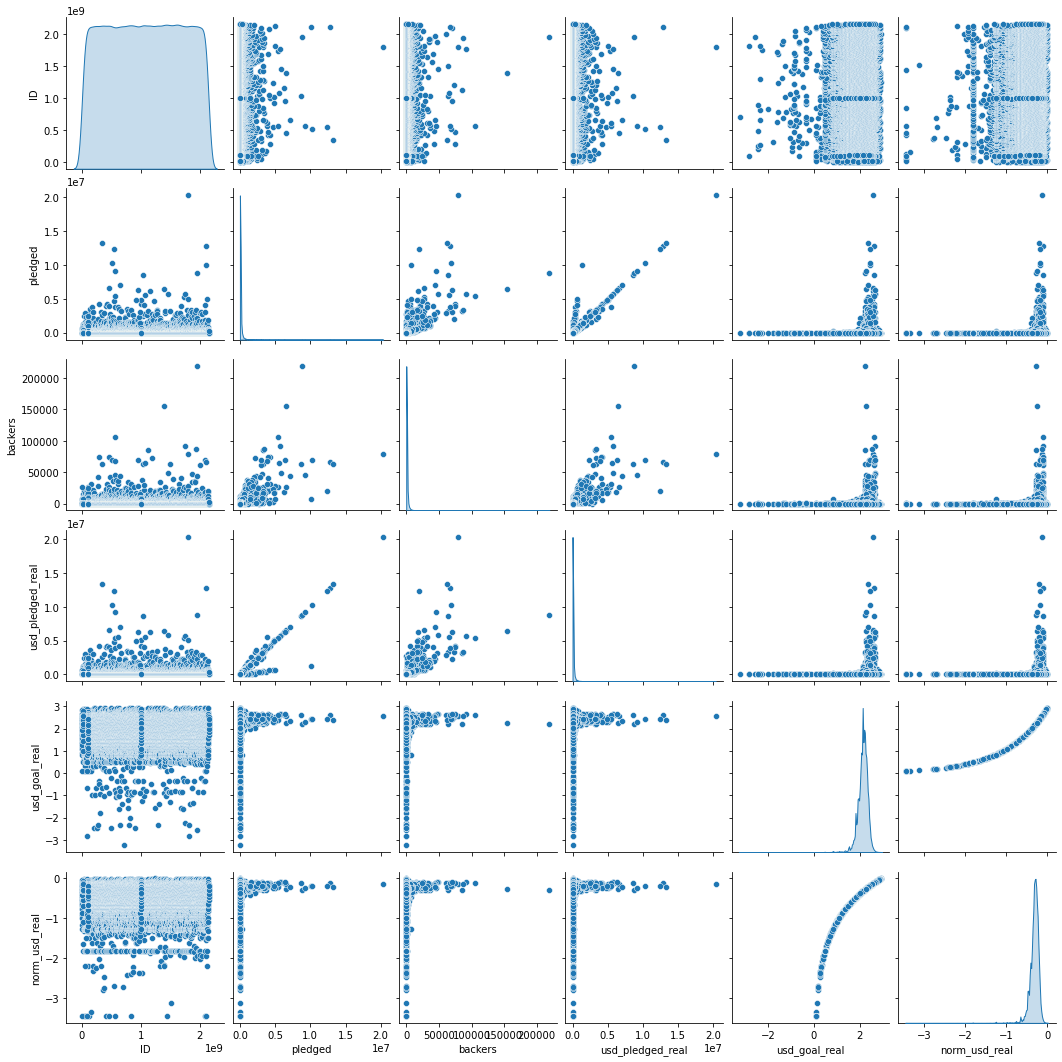

In [30]:
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# model = scaler.fit(non_null_data['usd_goal_real'])
# scaled_data = model.transform(non_null_data['usd_goal_real'])

non_null_data['norm_usd_real'] = non_null_data['usd_goal_real']/np.max(non_null_data['usd_goal_real'])
non_null_data['norm_usd_real'] = np.log(non_null_data['norm_usd_real'])

sns.pairplot(non_null_data, diag_kind='kde')

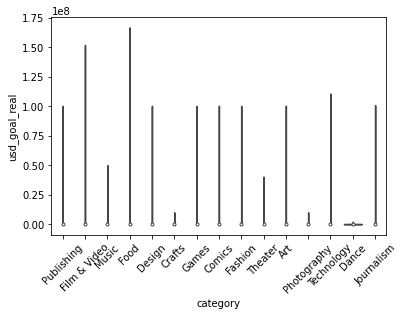

In [32]:

sns.violinplot(data=raw_data,x='category',y='usd_goal_real')
plt.xticks(rotation=45)
plt.show()